<a href="https://colab.research.google.com/github/georgsmeinung/rn4-multilayer-percep/blob/main/RN-Clase04/Keras_IRIS_SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
ColabNotebook = 'google.colab' in str(get_ipython())

if ColabNotebook:
    # monta G-drive en entorno COLAB
    from google.colab import drive
    drive.mount('/content/drive/')

    # carpeta donde se encuentran archivos .py auxiliares
    FUENTES_DIR = '/content/drive/MyDrive/Colab Notebooks/FUENTES/'
    DATOS_DIR = '/content/drive/MyDrive/Colab Notebooks/DATOS/'      # carpeta donde se encuentran los datasets
else:
    # configuración para notebook con instalación LOCAL
    FUENTES_DIR = '../Fuentes'         # carpeta donde se encuentran archivos .py auxiliares
    DATOS_DIR   = '../Datos/' # carpeta donde se encuentran los datasets

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

Mounted at /content/drive/


In [2]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing, metrics, model_selection
import pandas as pd

In [3]:
df = pd.read_csv(DATOS_DIR + 'iris.csv')

# Tomamos todas las columnas menos la última
X = np.array(df.iloc[:, 0:-1])
T = np.array(df.iloc[:,-1])

#Hay 50 muestras de cada tipo de flor
print(T[[1,50,100]])

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [4]:
# convertimos las etiquetas categóricas en numéricas
encoder = preprocessing.LabelEncoder()
T = encoder.fit_transform(T)
print(T[[1,50,100]])

[0 1 2]


In [5]:
#--- CONJUNTOS DE ENTRENAMIENTO Y TESTEO ---
X_train, X_test, T_train, T_test = model_selection.train_test_split( \
        X, T, test_size=0.30) #, random_state=42)

T_trainB = to_categorical(T_train)
print(T_trainB[:5, :])

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]]


In [6]:
normalizarEntrada = 1  # 1 si normaliza; 0 si no

if normalizarEntrada:
    # normalización usando media y desvío
    min_max_scaler = preprocessing.StandardScaler()
    X_train = min_max_scaler.fit_transform(X_train)
    X_test = min_max_scaler.transform(X_test)

### Definición del modelo

In [7]:
# Crear un modelo de capas secuenciales
model=Sequential()

# Agregar las capas al modelo
model.add(Dense(2, input_shape=[4], activation='tanh'))
model.add(Dense(3, activation='sigmoid'))

# Imprimir un resumen del modelo
model.summary()



/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19 (76.00 B)

 Trainable params: 19 (76.00 B)

 Non-trainable params: 0 (0.00 B)

In [44]:
# Configuración para entrenamiento
# model.compile(optimizer=SGD(learning_rate=0.05), loss='mse', metrics=['accuracy'])
# model.compile(optimizer=SGD(learning_rate=0.05), loss='binary_crossentropy', metrics=['accuracy'])

model.compile(optimizer=SGD(learning_rate=0.05), loss='categorical_crossentropy', metrics=['accuracy'])

In [48]:
# H = model.fit(X_train,T_trainB, epochs=100, batch_size=15)
H = model.fit(X_train,T_trainB, epochs=100)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9851 - loss: 0.0418
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9903 - loss: 0.0235
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9903 - loss: 0.0286
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9788 - loss: 0.0638
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9851 - loss: 0.0354
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9757 - loss: 0.0692 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9695 - loss: 0.0718
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9757 - loss: 0.0525
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9757 - loss: 0.0672
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9882 - loss: 0.0298
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9903 - loss: 0.0246
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9903 - l

In [49]:
# Calcular el error del modelo
score = model.evaluate(X_train, T_trainB)
print('Error :', score[0])
print('Accuracy:', score[1])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9820 - loss: 0.0447
Error : 0.04606999456882477
Accuracy: 0.9809523820877075


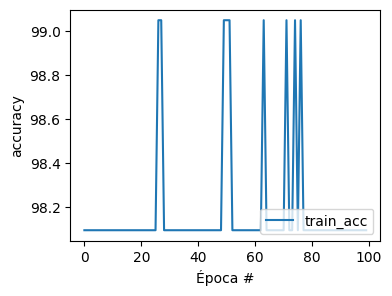

In [50]:
# dibuja accuracy del progreso del entrenamiento
accuracy = np.array(H.history["accuracy"])

N = np.arange(0, len(accuracy))
plt.figure(figsize=(4,3))
plt.plot(N, 100*accuracy, label="train_acc")
#plt.title("Efectividad de Entrenamiento")
plt.xlabel("Época #")
plt.ylabel("accuracy")
plt.legend(loc="lower right")

In [39]:
# predecir la salida del modelo
Y_pred = model.predict(X_train)
print(Y_pred[:5])

Y_pred2 = np.argmax(Y_pred,axis=1)
print(Y_pred2[:5])

print("%% aciertos X_train : %.3f" % metrics.accuracy_score(T_train, Y_pred2))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[[9.9379283e-01 1.3393731e-02 6.6076056e-04]
 [8.9668250e-03 9.8752636e-01 4.2037270e-03]
 [6.3543307e-04 1.3121383e-01 8.9571458e-01]
 [2.9863644e-04 2.0493118e-02 9.8878235e-01]
 [9.9380600e-01 1.3368715e-02 6.6049612e-04]]
[0 1 2 2 0]
% aciertos X_train : 0.981


In [40]:
report = metrics.classification_report(T_train, Y_pred2)
print("Confusion matrix Training:\n%s" % report)

MM = metrics.confusion_matrix(T_train, Y_pred2)
print("Confusion matrix:\n%s" % MM)

Confusion matrix Training:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.97      0.97      0.97        36
           2       0.97      0.97      0.97        34

    accuracy                           0.98       105
   macro avg       0.98      0.98      0.98       105
weighted avg       0.98      0.98      0.98       105

Confusion matrix:
[[35  0  0]
 [ 0 35  1]
 [ 0  1 33]]


In [14]:
model.save("miniIris.keras")

In [15]:
from keras.models import load_model
modelo2 = load_model("miniIris.keras")
modelo2.summary()

# predecir la salida del modelo
Y_pred = modelo2.predict(X_train)
print(Y_pred[:5])


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21 (88.00 B)

 Trainable params: 19 (76.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
[[0.6311462  0.5333814  0.17392175]
 [0.71382046 0.59358245 0.14027515]
 [0.18274906 0.26674053 0.7286069 ]
 [0.18435891 0.26872274 0.7312139 ]
 [0.5673325  0.49163365 0.20759629]]
